In [1]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from collections import Counter, defaultdict

In [22]:
pip install WordCloud


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df_ = pd.read_csv("df_w_embeddings_cluster.csv")

In [8]:
df = df_[df_["cluster"]==2]

In [10]:
def tokenize(dataset, column):
    from nltk.stem import WordNetLemmatizer 
    import re 
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = []
    for comment in dataset[column]:
        comment = re.sub("[^-9A-Za-z ]", "" , comment)
        comment = re.sub(r'https?:\/\/?[a-z0-9]+\.[a-z0-9\/]+', 'URL', comment)
        comment = comment.lower()
        tokens = nltk.word_tokenize(comment)
        for word in comment:
            word = lemmatizer.lemmatize(word) 
        
        tokens = " ".join(tokens)
        tokenized_sentences.append(tokens)
    dataset[column] = tokenized_sentences


In [13]:
tokenize(df, "text")

C:\Users\vomit\AppData\Local\Temp\ipykernel_27484\3987221858.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = tokenized_sentences


In [17]:
def remove_stopwords(dataset, column):
    stop_words = set(stopwords.words('english')) 
    sentences=[] 
    for comment in dataset["text"]:
        sentence=[] 
        comment = nltk.word_tokenize(comment)
        for word in comment:
            if word not in stop_words:
                sentence.append(word)
        sentences.append(sentence)
    dataset[column] = sentences

In [18]:
remove_stopwords(df,'text')

C:\Users\vomit\AppData\Local\Temp\ipykernel_27484\2309534030.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = sentences


In [19]:
df

,Unnamed: 0,id,text,url,type,postbody,score,created,subreddit,embeddings,cluster
23,23,jhlko6u,"[good, luck, god, speedpsstt, comrade, coordin...",NaN,comment,NaN,6,1.682387e+09,Ukraine Conflict,"[-0.004681102465838194, -0.014564935117959976,...",2
28,28,jhnv42u,"[wonder, theres, merit, spreading, disinformat...",NaN,comment,NaN,2,1.682436e+09,Ukraine Conflict,"[-0.02484123222529888, -0.012736452743411064, ...",2
41,41,134dr1n,"[preparation, firing, precision, guidedexcalib...",https://v.redd.it/wkzp7q2xp5xa1,post,NaN,156,1.682919e+09,Ukraine Conflict,"[-0.014809911139309406, 0.022826286032795906, ...",2
42,42,jiej602,"[id, weld, big, nut, centre, wheels, apply, v,...",NaN,comment,NaN,9,1.682924e+09,Ukraine Conflict,"[-0.023338716477155685, 0.0004996755160391331,...",2
43,43,jielz3x,"[fired, straight, ballsack, way, brasses, asse...",NaN,comment,NaN,4,1.682926e+09,Ukraine Conflict,"[-0.02844550646841526, -0.0004422950732987374,...",2
...,...,...,...,...,...,...,...,...,...,...,...
24251,24251,jhsdzkw,"[isnt, svd, dmr, rather, sniper, rifle]",NaN,comment,NaN,2,1.682519e+09,Ukraine Russia Report,"[-0.028242669999599457, 0.02019587531685829, -...",2
24253,24253,jhrx9l3,"[number, reasons, f, compatible, grippen, woul...",NaN,comment,NaN,10,1.682511e+09,Ukraine Russia Report,"[-0.009640284813940525, -0.033203914761543274,...",2
24254,24254,jhrjroj,"[shit, logistic, nightmare, western, jet, impo...",NaN,comment,NaN,21,1.682502e+09,Ukraine Russia Report,"[0.004778023809194565, -0.02125200815498829, -...",2
24255,24255,jhrx3x3,"[way, ua, getting, fs, united, states, flying,...",NaN,comment,NaN,10,1.682511e+09,Ukraine Russia Report,"[-0.009531148709356785, -0.018186921253800392,...",2


In [20]:
df.to_csv("topic_2_tokenized_no_stopwords.csv")

***BEGINNING OF TOPICMODELING***

In [16]:
df = pd.read_csv("topic_2_tokenized_no_stopwords.csv")

In [9]:
words = " "
for comment in df["text"]:
    for word in comment.split():
        words += word + " " 

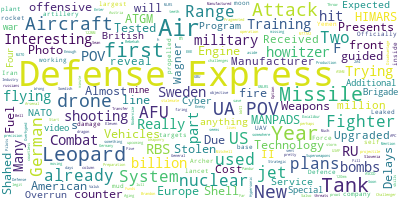

In [10]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(words)
wordcloud.to_image()

In [18]:
word_frequencies = Counter()
for sentence in df["text"]:
    for word in sentence.split():
        word_frequencies[word] += 1

In [19]:
word_frequencies

Counter({"'like',": 345,
         "'would',": 165,
         "'drone',": 157,
         "'one',": 156,
         "'see',": 121,
         "'hit',": 119,
         "'could',": 110,
         "'war',": 106,
         "'air',": 104,
         "'even',": 103,
         "'military',": 97,
         "'dont',": 95,
         "'looks',": 94,
         "'still',": 93,
         "'get',": 92,
         "'much',": 86,
         "'also',": 84,
         "'know',": 83,
         "'use',": 83,
         "'time',": 80,
         "'tank',": 79,
         "'drones',": 79,
         "'many',": 77,
         "'us',": 76,
         "'going',": 76,
         "'video',": 75,
         "'first',": 75,
         "'probably',": 74,
         "'make',": 74,
         "'russian',": 72,
         "'missiles',": 72,
         "'im',": 72,
         "'think',": 71,
         "'-',": 70,
         "'tanks',": 67,
         "'really',": 67,
         "'used',": 65,
         "'good',": 63,
         "'thats',": 62,
         "'artillery',": 61,
         

In [7]:
df_ = pd.read_csv("df_w_embeddings_cluster")
df = df_[df_["cluster"]==2]
scoredf = df.sort_values(by=["score"], ascending= False)
for post in scoredf["text"][:200]:
    print(post)

Sweden launches research rocket, accidentally hits Norway
This is 15 hours of the US military’s budget for perspective.
Bullets and shells are flying everywhere. I’m a Hiba Morgan, a reporter in Khartoum, Sudan. Ask me anything.
The rocket, sent out to find intelligent life in space, have by ending up in Norway failed twice.
German technology stolen by Iran almost 20 years ago found in Shahed drones
C&C Generals knew what was up.
I wonder if the US would just straight up nuke NK into oblivion in response, or would they carry out a more conventional attack on their military targets?
For the first time, scientists detect seismic waves rippling through Mars' core
The old Jason Mendoza: "I'm telling you, Molotov cocktails work. Any time I had a problem, and I threw a Molotov cocktail, boom! Right away, I had a different problem."
So, like a [trolleybus](https://en.wikipedia.org/wiki/Trolleybus) but with trucks? Plenty of trolley buses have batteries that allows them to go some distance awa

In [11]:
df = df_[df_["cluster"]==2]
df = df[df["type"]== "post"]
scoredf = df.sort_values(by=["score"], ascending= False)
i =1
while i<100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i], "LINK:", scoredf["url"].iloc[i])
    i+=1

Bullets and shells are flying everywhere. I’m a Hiba Morgan, a reporter in Khartoum, Sudan. Ask me anything. 
SUBRED: World News LINK: https://www.reddit.com/r/worldnews/comments/1312ib0/bullets_and_shells_are_flying_everywhere_im_a/
German technology stolen by Iran almost 20 years ago found in Shahed drones 
SUBRED: World News LINK: https://www.pravda.com.ua/eng/news/2023/04/28/7399810/
For the first time, scientists detect seismic waves rippling through Mars' core 
SUBRED: World News LINK: https://www.salon.com/2023/04/25/for-the-first-time-scientists-detect-seismic-waves-rippling-through-mars-core/
A column of German leopard tanks is moving somewhere on the front line 
SUBRED: Ukraine Conflict LINK: https://v.redd.it/rppqzl1d91wa1
Himars are working 
SUBRED: Ukraine Conflict LINK: https://v.redd.it/vgfp9gok4qsa1
Another large explosion of a building in Bakhmut. How many Wagner parts can you see flying 
SUBRED: Ukraine Conflict LINK: https://v.redd.it/z4913qvl8zta1
The US will send F

IndexError: single positional indexer is out-of-bounds

In [13]:
df = df_[df_["cluster"]==2]
df = df[df["type"]== "comment"]
scoredf = df.sort_values(by=["score"], ascending= False)
i =1
while i<100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i], "LINK:", scoredf["url"].iloc[i])
    i+=1

The rocket, sent out to find intelligent life in space, have by ending up in Norway failed twice. 
SUBRED: World News LINK: nan
C&C Generals knew what was up. 
SUBRED: World News LINK: nan
I wonder if the US would just straight up nuke NK into oblivion in response, or would they carry out a more conventional attack on their military targets? 
SUBRED: World News LINK: nan
The old Jason Mendoza: "I'm telling you, Molotov cocktails work. Any time I had a problem, and I threw a Molotov cocktail, boom! Right away, I had a different problem." 
SUBRED: World News LINK: nan
So, like a [trolleybus](https://en.wikipedia.org/wiki/Trolleybus) but with trucks? Plenty of trolley buses have batteries that allows them to go some distance away from the wires as well. 
SUBRED: World News LINK: nan
Shit happens. [Denmark once bombed itself.](https://en.wikipedia.org/wiki/1982_Harpoon_missile_misfire_incident) 
SUBRED: World News LINK: nan
>The Department of National Defence says seven people were arreste

In [1]:
import pandas as pd
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
topic = df_[df_["cluster"]==2]
topic["topic"] = "Weaponry and Military Deployment Operations"
topic.to_csv("topic_2_labeled_originaltext.csv")

C:\Users\vomit\AppData\Local\Temp\ipykernel_24392\2497963598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic["topic"] = "Weaponry and Military Deployment Operations"
